In [311]:
cd ../output/MNLI/new

[Errno 2] No such file or directory: '../output/MNLI/new'
/Users/johnnyma/Documents/GitHub/MP-Edit/output/MNLI/new


In [312]:
ls

5000_fine-tuned_content-words_gold-label_beam_mnli_cond_pairs_tagged.csv
5000_fine-tuned_content-words_gold-label_diverse-beam_mnli_cond_pairs_tagged.csv
5000_fine-tuned_content-words_model-label_beam_mnli_cond_pairs_tagged.csv
5000_fine-tuned_content-words_model-label_diverse-beam_mnli_cond_pairs_tagged.csv
5000_fine-tuned_data-slices_gold-label_beam_mnli_cond_pairs_tagged.csv
5000_fine-tuned_data-slices_gold-label_diverse-beam_mnli_cond_pairs_tagged.csv
5000_fine-tuned_data-slices_model-label_beam_mnli_cond_pairs_tagged.csv
5000_fine-tuned_data-slices_model-label_diverse-beam_mnli_cond_pairs_tagged.csv
categories1.png
cleaned_5000_fine-tuned_content-words_gold-label_beam_mnli_cond_pairs_tagged.csv
cleaned_5000_fine-tuned_content-words_gold-label_diverse-beam_mnli_cond_pairs_tagged.csv
cleaned_5000_fine-tuned_content-words_model-label_beam_mnli_cond_pairs_tagged.csv
cleaned_5000_fine-tuned_content-words_model-label_diverse-beam_mnli_cond_pairs_tagged.csv
cleaned_5000_fine-tuned_data-s

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 16})

df = pd.read_csv('cleaned_5000_fine-tuned_content-words_model-label_beam_mnli_cond_pairs_tagged.csv')
df.shape

(25000, 27)

In [314]:
print(df.columns)
df.head()

Index(['Unnamed: 0', 'Unnamed: 0.1', 'line-num', 'pred-model', 'fill-model',
       'tokens-masked', 'prepend-model', 'sampling-strategy', 'premise',
       'hypothesis', 'mask-filled', 'token_changes', 'fill_prob', 'depth',
       'Word2Vec-Score', 'Bert-Score', 'gold-label', 'prepend-label',
       'targeted-label', 'orig-label', 'new-label', 'orig-label-prob',
       'same-label-prob', 'new-label-prob', 'label-changed',
       'same-label-prob-diff', 'flip-class'],
      dtype='object')


,Unnamed: 0,Unnamed: 0.1,line-num,pred-model,fill-model,tokens-masked,prepend-model,sampling-strategy,premise,hypothesis,...,prepend-label,targeted-label,orig-label,new-label,orig-label-prob,same-label-prob,new-label-prob,label-changed,same-label-prob-diff,flip-class
0,23053,23369,65716,RoBERTa-MNLI,fine-tuned,content-words,model-label,beam,uh-huh oh definitely definitely i know my step...,My stepdad bought a cheap computer for my mom.,...,1,entailment,neutral,neutral,0.71,0.72,0.72,False,0.01,Uncertain-Same
1,11630,11788,71739,RoBERTa-MNLI,fine-tuned,content-words,model-label,beam,Sankei-en is a special delight from February t...,Spring is the best time of year to visit Sanke...,...,1,contradiction,entailment,entailment,0.72,0.73,0.73,False,0.01,Uncertain-Same
2,4385,4440,64414,RoBERTa-MNLI,fine-tuned,content-words,model-label,beam,need to break out the bicycle too get that dow...,The bicycle is still new but I will start ridi...,...,0,contradiction,entailment,entailment,0.80,0.76,0.76,False,0.04,Uncertain-Same
3,3325,3369,22790,RoBERTa-MNLI,fine-tuned,content-words,model-label,beam,One approach to using prototyping as part of t...,One approach to using prototyping has been des...,...,0,contradiction,entailment,entailment,0.99,0.76,0.76,False,0.23,Uncertain-Same
4,4754,4812,16634,RoBERTa-MNLI,fine-tuned,content-words,model-label,beam,It begins with the steps in a preliminary asse...,The preliminary assessment is very important b...,...,1,contradiction,neutral,neutral,0.82,0.73,0.73,False,0.09,Uncertain-Same


# Visualizing Sentence and Token Similairty Measures

Text(0.5, 1.0, 'Mask Fill Sentence Similarity Measures')

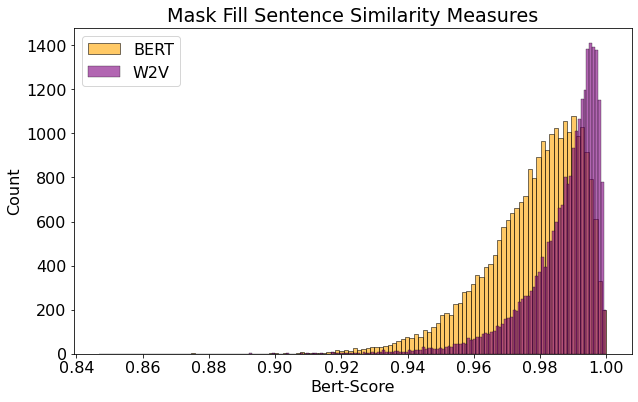

In [315]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(df['Bert-Score'], label = 'BERT', alpha = 0.6, color = 'orange')
sns.histplot(df['Word2Vec-Score'], label = 'W2V', alpha=0.6, color = 'purple')
plt.legend()
plt.title('Mask Fill Sentence Similarity Measures')

# plt.figure()
# fig, ax = plt.subplots(figsize=(10,6))
# sns.histplot(df['token-similarity'], label = 'TokSim', alpha=0.6, color = 'red')
# plt.title('Mask Fill Token Similarity Measures')
# plt.xlim([0,1])

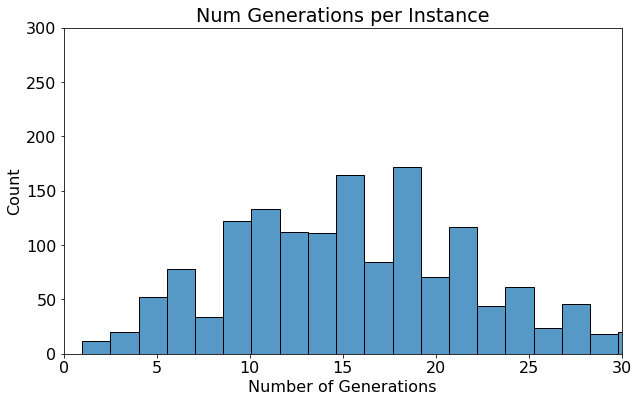

In [316]:
# Visualizing Number of Generations per Data Instance
fig, ax = plt.subplots(figsize=(10,6))
num_gens = df.groupby(df['line-num']).size()
sns.histplot(num_gens)
plt.xlim([0,30])
plt.ylim([0,300])
plt.xlabel('Number of Generations')
plt.title('Num Generations per Instance')
plt.savefig('instances1.png', dpi = 300)
plt.show()

# Visualizing Label Flip and Class Probability

Define four conditions based on label flip and probability of label, given by RoBERTA softmax.

1. Certain Flip
2. Uncertain Flip
3. Certain Same
4. Uncertain Same



<AxesSubplot:xlabel='same-label-prob-diff', ylabel='Count'>

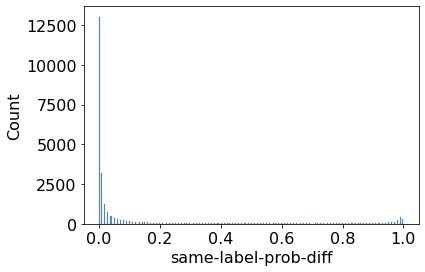

In [317]:
sns.histplot(df['same-label-prob-diff'])

## Subsetting Data into Potential Slices of Interest

In [318]:
uncertains = df.loc[df['orig-label-prob'] < 0.8] # initial model uncertain
certains = df.loc[df['orig-label-prob'] > 0.8] # initial model certain
# in_slice = df.loc[df['slice'] == 1] # example contains targeted words
# out_slice = df.loc[df['slice'] == 0] # example does not contain targeted words

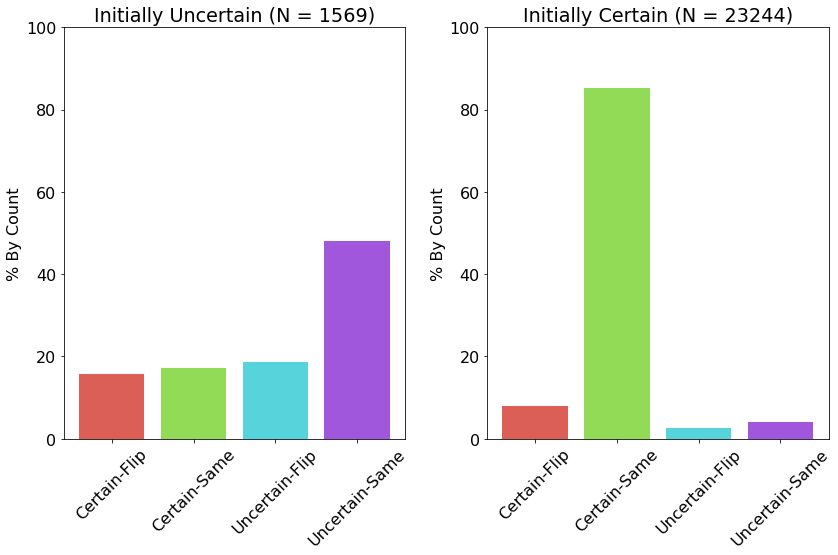

In [319]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12,8))
ax1, ax2 = axs.ravel()

counts = uncertains['flip-class'].groupby(uncertains['flip-class']).size()
N = sum(counts)
counts = counts/sum(counts) * 100

ax1.bar(range(len(counts)), counts, alpha = 1, align='center', color = list(sns.color_palette("hls", len(counts)).as_hex()))
ax1.set_xticks(range(4))
ax1.set_xticklabels(counts.index, rotation = 45, ha="center")
ax1.set_ylabel('% By Count')
ax1.set_title(f'Initially Uncertain (N = {N})')
ax1.set_ylim([0,100])

counts = certains['flip-class'].groupby(certains['flip-class']).size()
N = sum(counts)
counts = counts/sum(counts) * 100

ax2.bar(range(len(counts)), counts, alpha = 1, align='center', color = list(sns.color_palette("hls", len(counts)).as_hex()))
ax2.set_xticks(range(4))
ax2.set_xticklabels(counts.index, rotation = 45, ha="center")
ax2.set_ylabel('% By Count')
ax2.set_title(f'Initially Certain (N = {N})')
ax2.set_ylim([0,100])

# counts = in_slice['flip-class'].groupby(in_slice['flip-class']).size()
# N = sum(counts)
# counts = counts/sum(counts) * 100

# ax3.bar(range(len(counts)), counts, alpha = 1, align='center', color = list(sns.color_palette("hls", len(counts)).as_hex()))
# ax3.set_xticks(range(4))
# ax3.set_xticklabels(counts.index, rotation = 45, ha="center")
# ax3.set_ylabel('% By Count')
# ax3.set_title(f'In Slice (N = {N})')


# counts = out_slice['flip-class'].groupby(out_slice['flip-class']).size()
# N = sum(counts)
# counts = counts/sum(counts) * 100

# ax4.bar(range(len(counts)), counts, alpha = 1, align='center', color = list(sns.color_palette("hls", len(counts)).as_hex()))
# ax4.set_xticks(range(4))
# ax4.set_xticklabels(counts.index, rotation = 45, ha="center")
# ax4.set_ylabel('% By Count')
# ax4.set_title(f'Out Slice (N = {N})')

plt.tight_layout()
plt.savefig('categories1.png', dpi = 300)
plt.show()

## Tabulating the direction of Label Flips



In [320]:
from ast import literal_eval as make_tuple
from collections import Counter

# count of label switches in contrast set
switches = zip(df['orig-label'], df['new-label'])
switch_changes = Counter(switches)
print(switch_changes)

Counter({('neutral', 'neutral'): 8806, ('entailment', 'entailment'): 6741, ('contradiction', 'contradiction'): 6411, ('entailment', 'contradiction'): 666, ('entailment', 'neutral'): 521, ('contradiction', 'entailment'): 519, ('neutral', 'entailment'): 482, ('neutral', 'contradiction'): 446, ('contradiction', 'neutral'): 408})


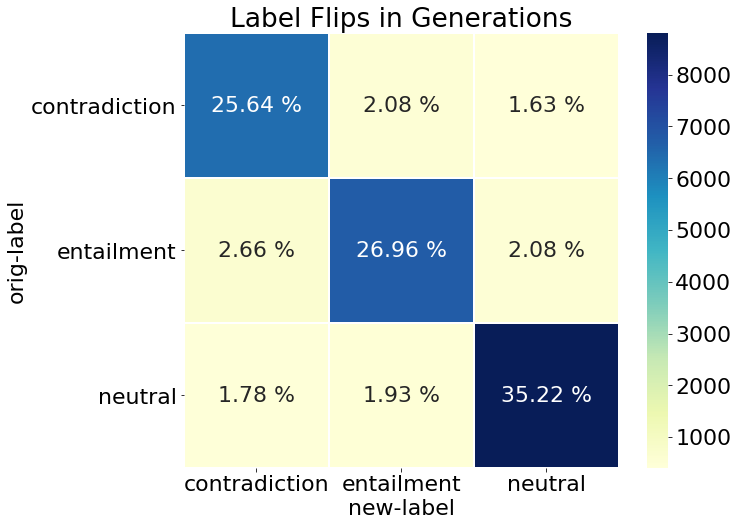

In [321]:
import matplotlib

RTE_mat = pd.crosstab(index=df['orig-label'], columns=[df['new-label']])
pcts = (round(RTE_mat/RTE_mat.sum().sum()*100, 2)).values.flatten()


matplotlib.rcParams.update({'font.size': 22})    

fig, axs = plt.subplots(figsize=(10,8))
ax = sns.heatmap(RTE_mat, annot=True, fmt = '.1f', square=1, linewidth=1., cmap="YlGnBu")


ind = 0
for t in ax.texts: 
    t.set_text(str(pcts[ind]) + " %")
    ind += 1


plt.title('Label Flips in Generations')
plt.savefig('label-flips1.png', dpi = 100)
plt.show()

In [322]:
switches = zip(df.loc[df['flip-class'] == 'Certain-Flip', 'orig-label'], df.loc[df['flip-class'] == 'Certain-Flip', 'new-label'])
switch_changes = Counter(switches)
print(switch_changes)

Counter({('entailment', 'contradiction'): 581, ('contradiction', 'entailment'): 412, ('neutral', 'entailment'): 298, ('entailment', 'neutral'): 297, ('neutral', 'contradiction'): 296, ('contradiction', 'neutral'): 219})


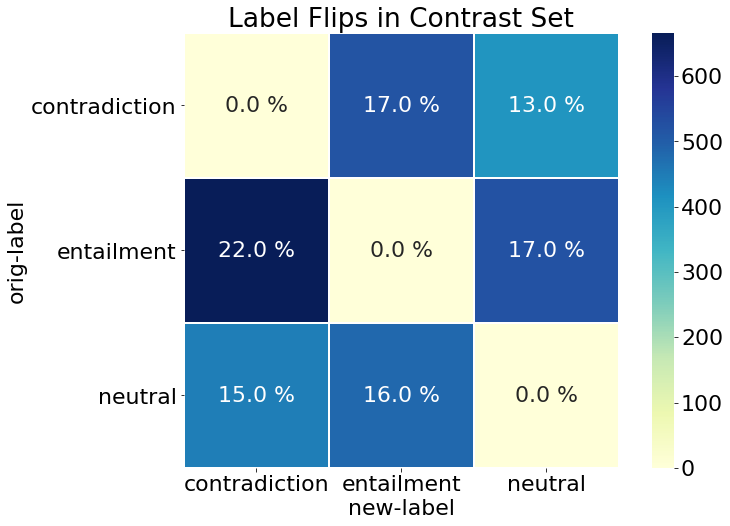

In [323]:
df = df[df['label-changed'] == 1]
RTE_mat = pd.crosstab(index=df['orig-label'], columns=[df['new-label']])
pcts = (round(RTE_mat/RTE_mat.sum().sum()*100)).values.flatten()

fig, axs = plt.subplots(figsize=(12,8))
ax = sns.heatmap(RTE_mat, annot=True, fmt = '.1f', square=1, linewidth=1., cmap="YlGnBu")

ind = 0
for t in ax.texts: 
    t.set_text(str(pcts[ind]) + " %")
    ind += 1

plt.title('Label Flips in Contrast Set')
plt.show()